# Pandas

In [1]:
from os import path

In [2]:
address = '/Users/mattjwilliams/Documents/LinkedInDataScience/PythonScientificStack/Exercise Files/Ch04/04_02/track.csv'
fname = path.expanduser('/Users/mattjwilliams/Documents/LinkedInDataScience/PythonScientificStack/Exercise  Files/Ch04/04_02/track.csv')

In [3]:
fname

'/Users/mattjwilliams/Documents/LinkedInDataScience/PythonScientificStack/Exercise  Files/Ch04/04_02/track.csv'

In [4]:
!ls -lh "$address"

-rwxrwxrwx@ 1 mattjwilliams  staff    43K Apr  7  2017 /Users/mattjwilliams/Documents/LinkedInDataScience/PythonScientificStack/Exercise Files/Ch04/04_02/track.csv


In [5]:
path.getsize(address) / (1<<10)

42.81640625

In [6]:
!head "$address"

time,lat,lng,height
2015-08-20 03:48:07.235,35.015021,32.519585,136.1999969482422
2015-08-20 03:48:24.734,35.014954,32.519606,126.5999984741211
2015-08-20 03:48:25.660,35.014871,32.519612,123.0
2015-08-20 03:48:26.819,35.014824,32.519654,120.5
2015-08-20 03:48:27.828,35.014776,32.519689,118.9000015258789
2015-08-20 03:48:29.720,35.014704,32.519691,119.9000015258789
2015-08-20 03:48:30.669,35.014657,32.519734,120.9000015258789
2015-08-20 03:48:33.793,35.014563,32.519719,121.69999694824219
2015-08-20 03:48:34.869,35.014549,32.519694,121.19999694824219


In [7]:
with open(address) as fp:
    for lnum, line in enumerate(fp):
        if lnum > 10:
            break
        print(line[:-1])

time,lat,lng,height
2015-08-20 03:48:07.235,35.015021,32.519585,136.1999969482422
2015-08-20 03:48:24.734,35.014954,32.519606,126.5999984741211
2015-08-20 03:48:25.660,35.014871,32.519612,123.0
2015-08-20 03:48:26.819,35.014824,32.519654,120.5
2015-08-20 03:48:27.828,35.014776,32.519689,118.9000015258789
2015-08-20 03:48:29.720,35.014704,32.519691,119.9000015258789
2015-08-20 03:48:30.669,35.014657,32.519734,120.9000015258789
2015-08-20 03:48:33.793,35.014563,32.519719,121.69999694824219
2015-08-20 03:48:34.869,35.014549,32.519694,121.19999694824219
2015-08-20 03:48:37.708,35.014515,32.519625,121.69999694824219


In [8]:
with open(address) as fp:
    print(sum(1 for line in fp))

741


In [9]:
import pandas as pd

In [10]:
df = pd.read_csv(address)

In [11]:
len(df)

740

In [12]:
df.columns

Index(['time', 'lat', 'lng', 'height'], dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    740 non-null    object 
 1   lat     740 non-null    float64
 2   lng     740 non-null    float64
 3   height  740 non-null    float64
dtypes: float64(3), object(1)
memory usage: 23.2+ KB


In [14]:
df.head()

,time,lat,lng,height
0,2015-08-20 03:48:07.235,35.015021,32.519585,136.199997
1,2015-08-20 03:48:24.734,35.014954,32.519606,126.599998
2,2015-08-20 03:48:25.660,35.014871,32.519612,123.000000
3,2015-08-20 03:48:26.819,35.014824,32.519654,120.500000
4,2015-08-20 03:48:27.828,35.014776,32.519689,118.900002


In [15]:
df.dtypes

time       object
lat       float64
lng       float64
height    float64
dtype: object

Pandas has encoded the time as an object, most likely a string.

In [16]:
df = pd.read_csv(address, parse_dates=['time'])

In [17]:
df.dtypes

time      datetime64[ns]
lat              float64
lng              float64
height           float64
dtype: object

In [18]:
df.head()

,time,lat,lng,height
0,2015-08-20 03:48:07.235,35.015021,32.519585,136.199997
1,2015-08-20 03:48:24.734,35.014954,32.519606,126.599998
2,2015-08-20 03:48:25.660,35.014871,32.519612,123.000000
3,2015-08-20 03:48:26.819,35.014824,32.519654,120.500000
4,2015-08-20 03:48:27.828,35.014776,32.519689,118.900002


In [19]:
df.iloc[0]

time      2015-08-20 03:48:07.235000
lat                           35.015
lng                          32.5196
height                         136.2
Name: 0, dtype: object

In [20]:
import numpy as np

In [21]:
df1 = pd.DataFrame(np.arange(10).reshape((5,2)), columns=['x', 'y'], index=['a', 'b', 'c', 'd', 'e'])
df1

,x,y
a,0,1
b,2,3
c,4,5
d,6,7
e,8,9


In [22]:
df1.loc['a':'d']

,x,y
a,0,1
b,2,3
c,4,5
d,6,7


In [23]:
df.index

RangeIndex(start=0, stop=740, step=1)

In [24]:
df.index=df['time']
df.index

DatetimeIndex(['2015-08-20 03:48:07.235000', '2015-08-20 03:48:24.734000',
               '2015-08-20 03:48:25.660000', '2015-08-20 03:48:26.819000',
               '2015-08-20 03:48:27.828000', '2015-08-20 03:48:29.720000',
               '2015-08-20 03:48:30.669000', '2015-08-20 03:48:33.793000',
               '2015-08-20 03:48:34.869000', '2015-08-20 03:48:37.708000',
               ...
               '2015-08-20 04:20:18.844000', '2015-08-20 04:20:21.996000',
               '2015-08-20 04:20:22.897000', '2015-08-20 04:20:24.905000',
               '2015-08-20 04:20:25.835000', '2015-08-20 04:20:28.982000',
               '2015-08-20 04:20:29.923000', '2015-08-20 04:20:32.863000',
               '2015-08-20 04:20:33.994000', '2015-08-20 04:20:42.329000'],
              dtype='datetime64[ns]', name='time', length=740, freq=None)

In [25]:
df.loc['2015-08-20 04:18:54']

,time,lat,lng,height
time,,,,
2015-08-20 04:18:54.007,2015-08-20 04:18:54.007,35.015942,32.515209,117.099998
2015-08-20 04:18:54.893,2015-08-20 04:18:54.893,35.015937,32.515240,117.500000


In [26]:
df.loc['2015-08-20 03:48']

,time,lat,lng,height
time,,,,
2015-08-20 03:48:07.235,2015-08-20 03:48:07.235,35.015021,32.519585,136.199997
2015-08-20 03:48:24.734,2015-08-20 03:48:24.734,35.014954,32.519606,126.599998
2015-08-20 03:48:25.660,2015-08-20 03:48:25.660,35.014871,32.519612,123.000000
2015-08-20 03:48:26.819,2015-08-20 03:48:26.819,35.014824,32.519654,120.500000
2015-08-20 03:48:27.828,2015-08-20 03:48:27.828,35.014776,32.519689,118.900002
2015-08-20 03:48:29.720,2015-08-20 03:48:29.720,35.014704,32.519691,119.900002
2015-08-20 03:48:30.669,2015-08-20 03:48:30.669,35.014657,32.519734,120.900002
2015-08-20 03:48:33.793,2015-08-20 03:48:33.793,35.014563,32.519719,121.699997
2015-08-20 03:48:34.869,2015-08-20 03:48:34.869,35.014549,32.519694,121.199997


In [27]:
import pytz

In [28]:
ts = df.index[0]

In [29]:
ts.tz_localize(pytz.UTC)

Timestamp('2015-08-20 03:48:07.235000+0000', tz='UTC')

In [30]:
ts.tz_localize(pytz.UTC).tz_convert(pytz.timezone('Asia/Jerusalem'))

Timestamp('2015-08-20 06:48:07.235000+0300', tz='Asia/Jerusalem')

In [31]:
df.index = df.index.tz_localize(pytz.UTC).tz_convert(pytz.timezone('Asia/Jerusalem'))
df.index[:10]

DatetimeIndex(['2015-08-20 06:48:07.235000+03:00',
               '2015-08-20 06:48:24.734000+03:00',
               '2015-08-20 06:48:25.660000+03:00',
               '2015-08-20 06:48:26.819000+03:00',
               '2015-08-20 06:48:27.828000+03:00',
               '2015-08-20 06:48:29.720000+03:00',
               '2015-08-20 06:48:30.669000+03:00',
               '2015-08-20 06:48:33.793000+03:00',
               '2015-08-20 06:48:34.869000+03:00',
               '2015-08-20 06:48:37.708000+03:00'],
              dtype='datetime64[ns, Asia/Jerusalem]', name='time', freq=None)

There's a script provided in the exercise files whicj convert latitude and longitude to distance. This will be imported here to aid in computing speeds in the pandas dataframe.

In [32]:
import geo

In [33]:
import sys
sys.path

['/Users/mattjwilliams/Documents/LinkedInDataScience/PythonScientificStack',
 '/Users/mattjwilliams/anaconda3/envs/pfds/lib/python38.zip',
 '/Users/mattjwilliams/anaconda3/envs/pfds/lib/python3.8',
 '/Users/mattjwilliams/anaconda3/envs/pfds/lib/python3.8/lib-dynload',
 '',
 '/Users/mattjwilliams/anaconda3/envs/pfds/lib/python3.8/site-packages',
 '/Users/mattjwilliams/anaconda3/envs/pfds/lib/python3.8/site-packages/IPython/extensions',
 '/Users/mattjwilliams/.ipython']

In [34]:
??geo

Type:        module
String form: <module 'geo' from '/Users/mattjwilliams/Documents/LinkedInDataScience/PythonScientificStack/geo.py'>
File:        ~/Documents/LinkedInDataScience/PythonScientificStack/geo.py
Source:     
"""Distance on a circle"""

import numpy as np


def circle_dist(lat1, lng1, lat2, lng2):
    """
    Distance on a circle (in km)

    Parameters
    ----------
    lat1, lng1, lat2, lng2: float or array of float

    Returns
    -------
    distance:
      distance from ``(lat1, lng1)`` to ``(lat2, lng2)`` in kilometers.
    """
    phi1 = np.deg2rad(90 - lat1)
    phi2 = np.deg2rad(90 - lat2)

    theta1 = np.deg2rad(lng1)
    theta2 = np.deg2rad(lng2)

    cos = (np.sin(phi1) * np.sin(phi2) * np.cos(theta1 - theta2) +
           np.cos(phi1) * np.cos(phi2))
    arc = np.arccos(cos)
    return arc * 6373  # Earth radius in km


In [35]:
from geo import circle_dist
lat1, lng1 = df.iloc[0].lat, df.iloc[0].lng
lat2, lng2 = df.iloc[1].lat, df.iloc[1].lng

In [36]:
circle_dist(lat1, lng1, lat2, lng2)

0.007695103586769196

In [37]:
s = pd.Series(np.arange(5))
s

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [38]:
s.shift()

0    NaN
1    0.0
2    1.0
3    2.0
4    3.0
dtype: float64

In [39]:
s.shift(-1)

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
dtype: float64

In [40]:
dist = circle_dist(df['lat'], df['lng'], df['lat'].shift(), df['lng'].shift())

In [41]:
dist[:10]

time
2015-08-20 06:48:07.235000+03:00         NaN
2015-08-20 06:48:24.734000+03:00    0.007695
2015-08-20 06:48:25.660000+03:00    0.009248
2015-08-20 06:48:26.819000+03:00    0.006479
2015-08-20 06:48:27.828000+03:00    0.006219
2015-08-20 06:48:29.720000+03:00    0.008010
2015-08-20 06:48:30.669000+03:00    0.006533
2015-08-20 06:48:33.793000+03:00    0.010545
2015-08-20 06:48:34.869000+03:00    0.002759
2015-08-20 06:48:37.708000+03:00    0.007336
dtype: float64

In [42]:
dist.sum()

4.6881365592010695

In [43]:
dt = df['time'] - df['time'].shift()

In [44]:
dt[:10]

time
2015-08-20 06:48:07.235000+03:00               NaT
2015-08-20 06:48:24.734000+03:00   00:00:17.499000
2015-08-20 06:48:25.660000+03:00   00:00:00.926000
2015-08-20 06:48:26.819000+03:00   00:00:01.159000
2015-08-20 06:48:27.828000+03:00   00:00:01.009000
2015-08-20 06:48:29.720000+03:00   00:00:01.892000
2015-08-20 06:48:30.669000+03:00   00:00:00.949000
2015-08-20 06:48:33.793000+03:00   00:00:03.124000
2015-08-20 06:48:34.869000+03:00   00:00:01.076000
2015-08-20 06:48:37.708000+03:00   00:00:02.839000
Name: time, dtype: timedelta64[ns]

In [45]:
dt.sum()

Timedelta('0 days 00:32:35.094000')

In [46]:
dt[1] / np.timedelta64(1, 'h')

0.004860833333333333

In [47]:
dt[1].total_seconds() / 3600

0.004860833333333333

In [48]:
speed = dist / (dt / np.timedelta64(1, 'h'))

In [49]:
speed[:10]

time
2015-08-20 06:48:07.235000+03:00          NaN
2015-08-20 06:48:24.734000+03:00     1.583083
2015-08-20 06:48:25.660000+03:00    35.954340
2015-08-20 06:48:26.819000+03:00    20.123165
2015-08-20 06:48:27.828000+03:00    22.187213
2015-08-20 06:48:29.720000+03:00    15.240609
2015-08-20 06:48:30.669000+03:00    24.781220
2015-08-20 06:48:33.793000+03:00    12.151207
2015-08-20 06:48:34.869000+03:00     9.230505
2015-08-20 06:48:37.708000+03:00     9.302840
dtype: float64

We needed to convert the time object into a scalar in order to compute the speed, and this was done with the numpy timedelta function. Now, the speed has a lot of variance due to the data points being very close together. To fix this, we will resample the dataframe.

In [50]:
df['dist'] = dist
df['dt'] = dt

In [51]:
df1m = df.resample('1min').sum()

In [52]:
df1m.index

DatetimeIndex(['2015-08-20 06:48:00+03:00', '2015-08-20 06:49:00+03:00',
               '2015-08-20 06:50:00+03:00', '2015-08-20 06:51:00+03:00',
               '2015-08-20 06:52:00+03:00', '2015-08-20 06:53:00+03:00',
               '2015-08-20 06:54:00+03:00', '2015-08-20 06:55:00+03:00',
               '2015-08-20 06:56:00+03:00', '2015-08-20 06:57:00+03:00',
               '2015-08-20 06:58:00+03:00', '2015-08-20 06:59:00+03:00',
               '2015-08-20 07:00:00+03:00', '2015-08-20 07:01:00+03:00',
               '2015-08-20 07:02:00+03:00', '2015-08-20 07:03:00+03:00',
               '2015-08-20 07:04:00+03:00', '2015-08-20 07:05:00+03:00',
               '2015-08-20 07:06:00+03:00', '2015-08-20 07:07:00+03:00',
               '2015-08-20 07:08:00+03:00', '2015-08-20 07:09:00+03:00',
               '2015-08-20 07:10:00+03:00', '2015-08-20 07:11:00+03:00',
               '2015-08-20 07:12:00+03:00', '2015-08-20 07:13:00+03:00',
               '2015-08-20 07:14:00+03:00', '2015-0

In [54]:
df1m.columns

Index(['lat', 'lng', 'height', 'dist'], dtype='object')

'dt' did not make it into the dataframe because sum works only on scalars.

In [55]:
df['dt'] = dt / np.timedelta64(1, 'h')
df1m = df.resample('1min').sum()
speed1m = df1m['dist'] / df1m['dt']

In [56]:
speed1m[:10]

time
2015-08-20 06:48:00+03:00     8.127204
2015-08-20 06:49:00+03:00     7.579874
2015-08-20 06:50:00+03:00     9.127708
2015-08-20 06:51:00+03:00    10.220254
2015-08-20 06:52:00+03:00    10.114795
2015-08-20 06:53:00+03:00     9.687816
2015-08-20 06:54:00+03:00    10.856153
2015-08-20 06:55:00+03:00    10.891833
2015-08-20 06:56:00+03:00    10.270188
2015-08-20 06:57:00+03:00     6.629179
Freq: T, dtype: float64

In [57]:
speed1m.describe()

count    33.000000
mean      8.658223
std       1.543122
min       5.287562
25%       7.542938
50%       8.537736
75%      10.220254
max      10.891833
dtype: float64

In [58]:
%matplotlib inline

In [59]:
import matplotlib.pyplot as plt

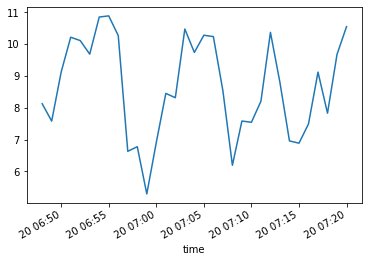

In [60]:
speed1m.plot()

In [61]:
plt.rcParams['figure.figsize'] = (10, 6)

In [62]:
plt.style.use('seaborn-whitegrid')

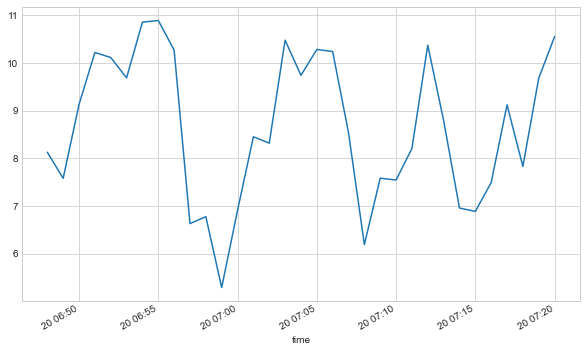

In [63]:
speed1m.plot()

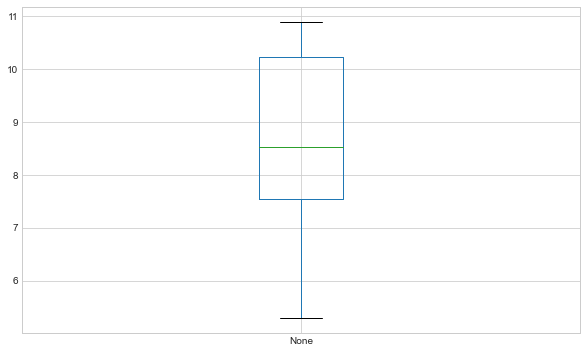

In [64]:
speed1m.plot.box()

In [65]:
import folium

# Creating a map of the run in Folium

In [66]:
m = folium.Map(location=[df['lng'].mean(), df['lat'].mean()], zoom_start=15)
def add_marker(row):
    marker = folium.CircleMarker(location=[row['lng'], row['lat']], color='red', popup=row['time'])
    marker.add_to(m)
    
df.apply(add_marker, axis=1)
m

There is a lot of overlap on the markers here, so we will repeat the code on a resampled dataframe.

In [67]:
m = folium.Map(location=[df['lng'].mean(), df['lat'].mean()], zoom_start=15)
mdf = df.resample('T').mean()
def add_marker(row):
    marker = folium.CircleMarker(location=[row['lng'], row['lat']], color='red', popup=row.name)
    marker.add_to(m)
    
mdf.apply(add_marker, axis=1)
m

In [78]:
mdf.iloc[0].name

Timestamp('2015-08-20 06:48:00+0300', tz='Asia/Jerusalem', freq='T')

# More map stuff with shapely

In [79]:
from shapely.geometry import Point, Polygon

In [80]:
pt = Point(1, 2)

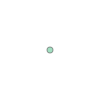

In [81]:
pt

In [82]:
poly = Polygon([[0, 0], [0, 10], [10, 10], [10, 0]])

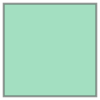

In [83]:
poly

In [84]:
poly.area

100.0

In [85]:
poly.centroid.xy

(array('d', [5.0]), array('d', [5.0]))

In [86]:
poly.intersects(pt)

True

In [87]:
poly.intersects(Point(10, 20))

False

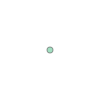

In [88]:
poly.convex_hull.centroid

In [90]:
mdf['pt'] = mdf[['lng', 'lat']].apply(Point, axis=1)
mdf.head()

,lat,lng,height,dist,dt,pt
time,,,,,,
2015-08-20 06:48:00+03:00,35.014571,32.519485,122.766666,0.005918,0.000728,POINT (32.51948457142857 35.01457057142857)
2015-08-20 06:49:00+03:00,35.014316,32.518971,122.966667,0.005670,0.000748,POINT (32.51897133333333 35.01431633333333)
2015-08-20 06:50:00+03:00,35.014055,32.517258,114.573913,0.012125,0.001328,POINT (32.51725782608695 35.0140552173913)
2015-08-20 06:51:00+03:00,35.013864,32.516264,106.653334,0.005681,0.000556,POINT (32.5162645 35.01386383333332)
2015-08-20 06:52:00+03:00,35.012744,32.515141,97.710000,0.005705,0.000564,POINT (32.51514063333333 35.0127444)


In [91]:
mean_lng, max_lng = mdf['lng'].mean(), mdf['lng'].max()
mean_lat, max_lat = mdf['lat'].mean(), mdf['lat'].max()

In [92]:
poly = Polygon([
    [mean_lng, mean_lat],
    [mean_lng, max_lat],
    [max_lng, max_lat],
    [max_lng, mean_lat]
])

In [93]:
poly.exterior.xy

(array('d', [32.5123189947394, 32.5123189947394, 32.51948457142857, 32.51948457142857, 32.5123189947394]),
 array('d', [35.01567806812503, 35.02252776190477, 35.02252776190477, 35.01567806812503, 35.01567806812503]))

In [95]:
np.stack(poly.exterior.xy).T

array([[32.51231899, 35.01567807],
       [32.51231899, 35.02252776],
       [32.51948457, 35.02252776],
       [32.51948457, 35.01567807],
       [32.51231899, 35.01567807]])

In [99]:
m = folium.Map(location=[df['lng'].mean(), df['lat'].mean()], zoom_start=15)
mdf = df.resample('T').mean()
mdf['pt'] = mdf[['lng', 'lat']].apply(Point, axis=1)
def add_marker(row):
    color = 'yellow' if poly.intersects(row['pt']) else 'green'
    marker = folium.CircleMarker(location=[row['lng'], row['lat']], color='red', popup=row.name,
                                fill_color=color)
    marker.add_to(m)
m.add_child(folium.PolyLine(np.stack(poly.exterior.xy).T, color='yellow'))    
mdf.apply(add_marker, axis=1)
m